# NMF Decomposition on LCD Digits Data with scikit-learn

## By Christopher Hauman
<br>

### This example of NMF Decomposition was taken from DataCamp's [Unsupervised Learning in Python](https://www.datacamp.com/courses/unsupervised-learning-in-python) course.

### Note: This assumes you have basic knowledge of python data science basics. If you don't, or encounter something you're not familiar with, don't worry! You can get a crash course in my guide, [Cleaning MLB Statcast Data using pandas DataFrames and seaborn Visualization](https://github.com/chrisman1015/Cleaning-Statcast-Data/blob/master/Cleaning%20Statcast%20Data/Cleaning%20Statcast%20Data.ipynb).
<br>

First, we'll import our libraries and import the lcd-digits data. You can take a peek at the attached csv file to see what it looks like raw. Each row corresponds to a grayscale digit image where the values are 0 for white and 1 for black. In other grayscale images you'll see a gradient of values between 0 and 1 for different shades of gray, but these consist of only black and white.

In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import data
df = pd.read_csv('lcd-digits.csv')
df.head()

#convert data to numPy array for processing
samples = np.array(df)

We'll quickly demonstrate the digits by looking at the first row (index 0) of the samples data.

In [78]:
# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


Now we'll reshape the array using **reshape** to it's intended shape, 13 rows by 8 columns

In [79]:
# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


Finally, we'll use pyplot's **imshow** to show what the image looks like:

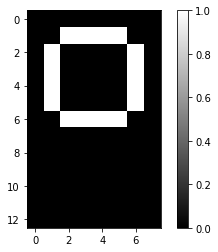

In [80]:
# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

Let's quickly create a function which will perfom this resampling and display the image for any row:

In [26]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

To demonstrate, we'll have it print the last image:

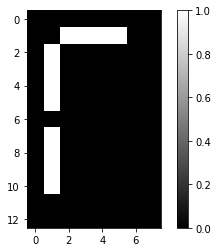

In [30]:
show_as_image(samples[-1,:])

Now it's time to demonstrate the beauty of NMF for image decomposition. We'll import and fit the model to the sample data:

In [32]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

Now that we've fit the model to the samples, we can use the **.components-** attribute of an NMF model, which contains parts of images in this case.

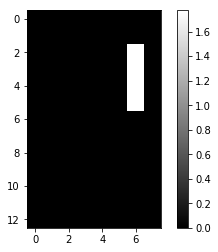

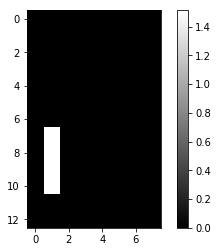

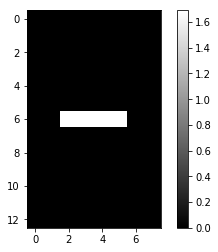

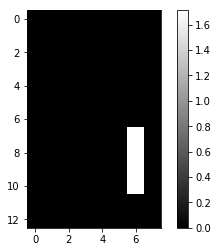

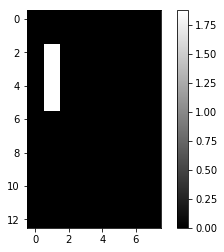

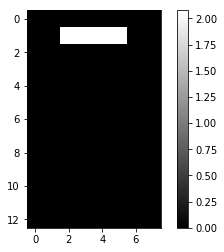

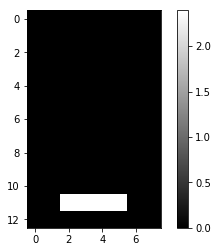

In [36]:
# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

Amazingly, the NMF model was able to correctly extract the individual parts which can be used to make any LCD image.
<br>

Let's quickly output the first row of the features array which was the result of fitting the model:

In [58]:
# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

[0.56389272 0.         0.59151401 0.         0.53290007 0.48133215
 0.        ]


Though these numbers may look like nonsense, they contain specific data which related the components back to the original values. We can use matrix multiplication with the features and components to approximately reconstruct the original samples.

In [62]:
reconstructed = np.matmul(features, model.components_)

# print the first 20 values of the first row of the reconstructed data
reconstructed[0,:]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.99999674e-01, 9.99999674e-01,
       9.99999674e-01, 9.99999674e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.99999784e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.99943174e-01, 0.00000000e+00,
       0.00000000e+00, 9.99999784e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.99943174e-01, 0.00000000e+00,
       0.00000000e+00, 9.99999784e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.99943174e-01, 0.00000000e+00,
       0.00000000e+00, 9.99999784e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.99943174e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

We see that none of the values are in the same format as the original samples, so we'll round them all to one decimal place:

In [75]:
# round the reconstructed data to one decimal place
rounded = np.around(reconstructed, decimals=1)

# print the first value
rounded[0,0]

0.0

Finally, we can use **array_equal** to see if the reconstructed array is the exact same as the original samples:

In [76]:
np.array_equal(rounded, samples)

True

There you have it! We can now perform NMF deconstruction and reconstruction with sklearn.